# Feature Selection

In [1]:
import warnings

import pandas as pd
import numpy as np

df_path = 'C:\imbalance_forecast\data\df_nord.csv'
df_nord = pd.read_csv(df_path, index_col=0, parse_dates=True)

# Check for duplicate timestamps in the index
duplicates = df_nord.index.duplicated(keep=False)  # True for duplicates
duplicate_timestamps = df_nord[duplicates]

# Remove duplicates by keeping the first occurrence
df_nord = df_nord[~df_nord.index.duplicated(keep='first')]

df_nord

<>:6: SyntaxWarning: invalid escape sequence '\i'
<>:6: SyntaxWarning: invalid escape sequence '\i'
C:\Users\samueledelia\AppData\Local\Temp\3\ipykernel_13144\1532803225.py:6: SyntaxWarning: invalid escape sequence '\i'
  df_path = 'C:\imbalance_forecast\data\df_nord.csv'


,SBIL_MWH,WIND_MWH,THERMO_MWH,SOLAR_MWH,HYDRO_MWH,GEO_MWH,AUSTRIA_MWQH,FRANCE_MWQH,SLOVENIA_MWQH,SWITZERLAND_MWQH,SCHEDULED_INTERNAL_EXCHANGE_MW,MGP_NORD_PURCHASES,MGP_NORD_SALES,MI1_NORD_PURCHASES,MI1_NORD_SALES,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,-47.312,1275.0,3337.5,0.0,515.0,167.5,39.00,-80.25,165.5,369.5,158.7875,2865.08100,2294.92325,206.93800,258.157,11776.405,12085.191
2019-01-01 00:15:00,-30.343,1275.0,3337.5,0.0,515.0,167.5,39.00,-80.25,165.5,369.5,158.7875,2865.08100,2294.92325,206.93800,258.157,11723.369,12010.132
2019-01-01 00:30:00,-20.311,1275.0,3337.5,0.0,515.0,167.5,39.00,-80.25,165.5,369.5,158.7875,2865.08100,2294.92325,206.93800,258.157,11771.133,11984.692
2019-01-01 00:45:00,-13.934,1275.0,3337.5,0.0,515.0,167.5,39.00,-80.25,165.5,369.5,158.7875,2865.08100,2294.92325,206.93800,258.157,11740.606,11935.066
2019-01-01 01:00:00,-65.080,1257.5,3272.5,0.0,437.5,167.5,39.25,-63.75,175.5,292.0,235.1475,2741.11600,2086.04475,224.06475,297.123,11559.374,11825.838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4043.27275,3301.95175,NaN,NaN,NaN,NaN
2024-10-31 22:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4043.27275,3301.95175,NaN,NaN,NaN,NaN
2024-10-31 22:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4043.27275,3301.95175,NaN,NaN,NaN,NaN


In [2]:
from sklearn.model_selection import TimeSeriesSplit

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
TARGET = "SBIL_MWH"
FEATURES = [feature for feature in df_nord.columns if feature != TARGET]

df_nord = df_nord.dropna()

# Fit a Random Forest regressor model:
selector = RandomForestRegressor(
    n_estimators=250,
    max_depth=7,
    criterion="squared_error",
    n_jobs=-1,
    verbose=True)

selector.fit(df_nord[FEATURES], df_nord[TARGET])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.2min finished


RandomForestRegressor(max_depth=7, n_estimators=250, n_jobs=-1, verbose=True)

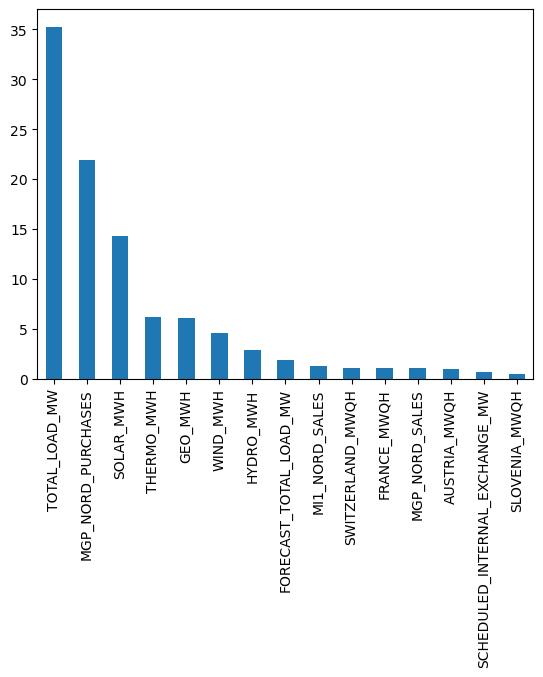

In [4]:
import matplotlib.pyplot as plt
feature_importance = pd.DataFrame(data={"importance": 100*selector.feature_importances_}, index=FEATURES)

# Plot importance scores:
# fig, ax = plt.subplots(figsize=[15,5])
feature_importance.importance.nlargest(15).plot(kind="bar")
# ax.bar([ii for ii in range(len(FEATURES))], to_show)
# plt.xticks([ii for ii in range(len(FEATURES))], FEATURES)
plt.show()